In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

**Reading data into dataframe**

In [23]:
df = pd.read_csv("student-performance-data.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


**Displaying information embedded in the dataset**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   StudentID             2392 non-null   int64  
 1   Age                   2392 non-null   int64  
 2   Gender                2392 non-null   int64  
 3   Ethnicity             2392 non-null   int64  
 4   ParentalEducation     2392 non-null   int64  
 5   StudyTimeWeekly       2392 non-null   float64
 6   Absences              2392 non-null   int64  
 7   Tutoring              2392 non-null   int64  
 8   ParentalSupport       2392 non-null   int64  
 9   Extracurricular       2392 non-null   int64  
 10  Sports                2392 non-null   int64  
 11  Music                 2392 non-null   int64  
 12  Volunteering          2392 non-null   int64  
 13  GPA                   2392 non-null   float64
 14  GradeClass            2392 non-null   int64  
 15  with_extracurricular 

In this project, we want to conduct an A/B testing hypothesis to see whether extracurricular activities has significant impact on students academic performances, using their respectives GPA as the key performance indicator.

**Displaying dataframe of students with extracurricular activities as the TREATMENT GROUP**

In [24]:
with_extracurricular_df = df[df['Extracurricular']==1]
with_extracurricular_df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0
12,1013,17,0,1,1,10.038712,21,0,3,1,0,0,0,1.520078,4


**Scupping out the treatment group key performance indicator (GPA)**

In [25]:
treatment_group = with_extracurricular_df[['Extracurricular', 'GPA']]
treatment_group.head()

,Extracurricular,GPA
3,1,2.054218
5,1,3.084184
7,1,1.360143
9,1,3.573474
12,1,1.520078


**Visualization of students' GPA distribution in the Treatment Group**

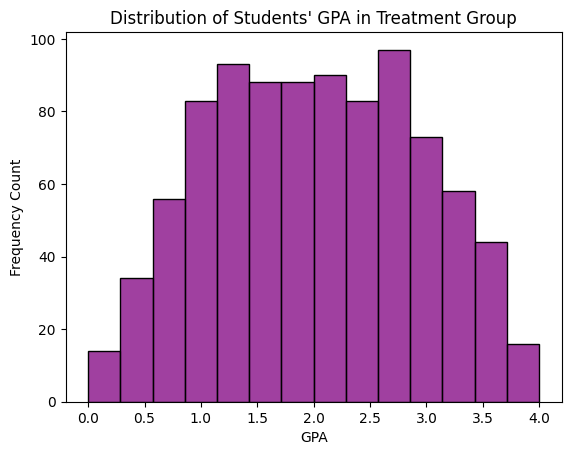

In [26]:
sns.histplot(treatment_group['GPA'], color='purple')
plt.ylabel('Frequency Count')
plt.title("Distribution of Students' GPA in Treatment Group");

**Displaying dataframe of students without extracurricular activities as the CONTROL GROUP**

In [27]:
without_extracurricular_df = df[df['Extracurricular']==0]
without_extracurricular_df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2


**Scupping out the control group key performance indicator (GPA)**

In [28]:
control_group = without_extracurricular_df[['Extracurricular', 'GPA']]
control_group.head()

,Extracurricular,GPA
0,0,2.929196
1,0,3.042915
2,0,0.112602
4,0,1.288061
6,0,2.748237


**Visualization of students' GPA distribution in the Control Group**

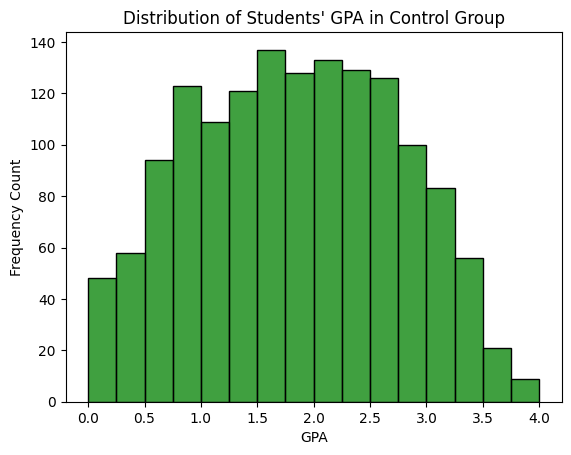

In [29]:
#sns.histplot(with_extracurricular_df, color='blue', label='With Extracirricular')
sns.histplot(control_group['GPA'], color='green')
plt.ylabel('Frequency Count')
plt.title("Distribution of Students' GPA in Control Group");

**Conducting T-test on both the treatment and the control group**

In [30]:
t_stat, p_value = stats.ttest_ind(treatment_group['GPA'], control_group['GPA'])
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 4.619755252865401
P-value: 4.045914083523249e-06


**Interpretation of T-test conducted on the treatment and the control groups**

In [34]:
alpha = 0.005
if p_value < alpha:
    print ("Reject the null hypothesis. There is a significant difference between the\
    control group (group without extracurricular activities) and treatment group\
    (group with extracurricular activities) i.e Extracurricular activities have\
    significant impact on academic performances of students")
else:
    print("Accept the null hypothesis. There is no significant difference between the\
    control group (group without extracurricular activities) and treatment group\
    (group with extracurricular activities) i.e Extracurricular activities have no\
    significant impact on academic performances of students")
    

Reject the null hypothesis. There is a significant difference between the    control group (group without extracurricular activities) and treatment group    (group with extracurricular activities) i.e Extracurricular activities have    significant impact on academic performances of students
